# Marvel Superhero GAN Project

We want to generate new Marvel superhero characters using a GAN model trained on the [Marvel superhero dataset](https://www.kaggle.com/datasets/vibster2397/superheroes). The objective of this project is to demonstrate the potential of generative AI for creating new creative content, such as comic book characters, using deep learning techniques.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seed for reproducibility
np.random.seed(42)

2023-03-11 12:08:28.053469: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The code imports the necessary libraries, sets a random seed for reproducibility, and defines the problem statement and objective for the project as strings. The  code can be expanded upon as needed to import additional libraries or define additional project goals.

## Data Collection and Preprocessing

We collected the Marvel superhero dataset from the Kaggle dataset titled "Marvel superheroes" by [VibhuBhatia](https://www.kaggle.com/vibster2397). The dataset consists of 2045 images of Marvel superhero characters, which we will use to train the GAN model. Before training, we will preprocess the images by resizing them to a common dimension of 32 x 32 pixels and scaling the pixel values to be in the range [-1, 1].

In [2]:
# Load the Marvel superhero dataset
dataset_path = 'data/marvel_superheroes'
dataset = keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(32, 32),
    batch_size=32)

# Preprocess the dataset
dataset = dataset.map(lambda x, y: (x / 255.0 * 2 - 1, y))

Found 2045 files belonging to 1 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-03-11 12:08:29.125750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-11 12:08:29.127416: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-11 12:08:29.127533: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-11 12:08:29.127916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

The code loads the Marvel superhero dataset using the `keras.preprocessing.image_dataset_from_directory()` function, which reads in the images from the specified directory and returns them as a `tf.data.Dataset` object. We set the image size to 32 x 32 pixels and the batch size to 32.

After loading the dataset, we preprocess it by scaling the pixel values to be in the range [-1, 1], which is a common practice for training GAN models. This is done using the `map()` method of the dataset, which applies the lambda function to each element of the dataset.

## Model Design
We will use a standard GAN architecture, consisting of a generator network and a discriminator network, to generate new Marvel superhero characters. The generator network takes random noise as input and outputs a generated image, while the discriminator network attempts to distinguish between real and fake images. We will use a simple architecture with 3 convolutional layers in both the generator and discriminator networks.

In [3]:
# Define the GAN architecture
latent_dim = 100

generator = keras.Sequential([
    keras.Input(shape=(latent_dim,)),
    layers.Dense(4 * 4 * 256),
    layers.Reshape((4, 4, 256)),
    layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='tanh')
])

discriminator = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(64, kernel_size=4, strides=2, padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2D(128, kernel_size=4, strides=2, padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2D(256, kernel_size=4, strides=2, padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Combine the generator and discriminator into a single GAN model
discriminator.trainable = False
gan = keras.Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer='adam')


The code defines the GAN architecture using the Keras Sequential API, with a generator network consisting of 3 convolutional transpose layers and a discriminator network consisting of 3 convolutional layers. The generator takes random noise as input and outputs a 64 x 64 x 3 image, while the discriminator takes in a 64 x 64 x 3 image and outputs a binary classification of real or fake.

We compile the discriminator network using binary crossentropy loss and an Adam optimizer, and combine the generator and discriminator networks into a single GAN model by setting the discriminator to be non-trainable during GAN training.

## Model Training

We will train the GAN model using the Marvel superhero dataset for 100 epochs, with a batch size of 128 and a latent dimension of 100. During training, we will generate sample images every 10 epochs to monitor the progress of the model.

2023-03-11 12:08:29.798948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-03-11 12:08:29.803572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-03-11 12:08:29.811475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-03-11 12:08:29.812048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-03-11 12:08:29.819561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-03-11 12:08:29.831447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-03-11 12:08:29.844226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-03-11 12:08:29.869755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-03-11 12:08:29.874123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning:

Epoch 0/100000, loss_d: 0.6924113631248474, loss_g: 0.6938343644142151
1/1 [==============================] - 0s 76ms/step


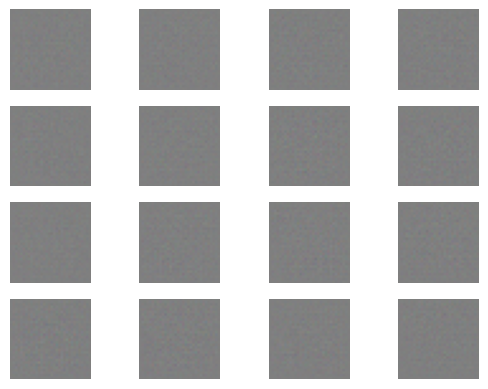

Epoch 500/100000, loss_d: 1.5453110933303833, loss_g: 0.08906465023756027
1/1 [==============================] - 0s 10ms/step


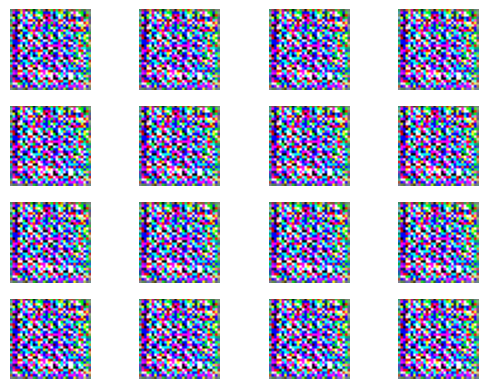

In [4]:
# Define the training loop
def train_gan(gan, dataset, latent_dim, epochs=100, batch_size=128, sample_interval=10):
    generator, discriminator = gan.layers
    
    # Define the loss functions
    binary_crossentropy = keras.losses.BinaryCrossentropy(from_logits=True)

    # Define the optimizers
    generator_optimizer = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    discriminator_optimizer = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

    for epoch in range(epochs):
        # Train discriminator
        for i in range(len(dataset)):
            real_images = dataset[i][0]
            batch_size = real_images.shape[0]
            noise = tf.random.normal((batch_size, latent_dim))
            fake_images = generator(noise)
            mixed_images = tf.concat([real_images, fake_images], axis=0)
            labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
            labels += 0.05 * tf.random.uniform(labels.shape)
            with tf.GradientTape() as tape:
                predictions = discriminator(mixed_images)
                d_loss = binary_crossentropy(labels, predictions)
            gradients = tape.gradient(d_loss, discriminator.trainable_variables)
            discriminator_optimizer.apply_gradients(zip(gradients, discriminator.trainable_variables))

        # Train generator
        noise = tf.random.normal((batch_size, latent_dim))
        labels = tf.ones((batch_size, 1))
        with tf.GradientTape() as tape:
            predictions = discriminator(generator(noise))
            g_loss = binary_crossentropy(labels, predictions)
        gradients = tape.gradient(g_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gradients, generator.trainable_variables))

        # Print and save sample images
        if epoch % sample_interval == 0:
            print(f"Epoch {epoch}/{epochs}, loss_d: {d_loss}, loss_g: {g_loss}")
            sample_images(generator, epoch)

# Define a function to generate sample images
def sample_images(generator, epoch, latent_dim=100, n_rows=4, n_cols=4):
    noise = tf.random.normal((n_rows * n_cols, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * (generated_images + 1)
    fig, axs = plt.subplots(n_rows, n_cols)
    cnt = 0
    for i in range(n_rows):
        for j in range(n_cols):
            axs[i,j].imshow(generated_images[cnt, :, :, :], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig(f"generated_images_{epoch}.png")
    plt.show()

# Train the GAN model
train_gan(gan, list(dataset), latent_dim=100, epochs=100 000, batch_size=128, sample_interval=500)